## Plotting all publicly-owned existing airports and helipads in Chicago Metropolitan Area

The purpose of this script is to plot the (lat, lon) of existing airport and helipad infrastructures of Chicago region 

To install fiona and GDAL, watch this: https://www.youtube.com/watch?v=GRyBR--2zFo
https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal

If geos_c.dll not found, go to here an download it: https://www.dll-files.com/geos_c.dll.html
Place it in the following path: Anaconda3\Library\bin\geos_c.dll


In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
import tilemapbase
import mplleaflet

In [247]:
tilemapbase.start_logging()

tilemapbase.init(create=True)

t = tilemapbase.tiles.build_OSM()

LatLim = [41, 42.5]
LonLim = [-89, -87]

In [248]:
extent = tilemapbase.Extent.from_lonlat(min(LonLim), max(LonLim), min(LatLim), max(LatLim))

In [249]:
from shapely import speedups
speedups.disable()

In [250]:
street_map = gpd.read_file("./Datasets/ChicagoData2/subzones17.shp")
street_map.to_crs(epsg=4326, inplace=True) # this converts to lat, long axis, #3857 or 4326

major = pd.read_excel("Datasets/Airports_Helipads_Chicago_Area_PU.xlsx", sheet_name = "Major_Airports_Chicago_Area")
regional = pd.read_excel("Datasets/Airports_Helipads_Chicago_Area_PU.xlsx", sheet_name = "Regional_Airports_Chicago_Area")
heliport = pd.read_excel("Datasets/Airports_Helipads_Chicago_Area_PU.xlsx", sheet_name = "Heliports_Chicago_Area")

Lat_regional = regional["LatD"]
Lon_regional = regional["LonD"]

Lat_heliports = heliport["LatD"]
Lon_heliports = heliport["LonD"]

Lat_major = major["LatD"]
Lon_major = major["LonD"]

d = {"LatD" : Lat_regional, "LonD" : Lon_regional}
all_p = pd.DataFrame(data=d)
lat_m_regional  = []
lon_m_regional = []
for i in range(len(all_p)):
    latt, lonn = merc((all_p["LatD"][i],all_p["LonD"][i]))
    lat_m_regional.append(latt)    
    lon_m_regional.append(lonn)
    #print(int(latt))
    #all_p['coords_x'] = all_p['LonD'].apply(lambda x: merc((all_p["LatD"][i],all_p["LonD"][i]))[0])
    #all_p['coords_y'] = all_p['LonD'].apply(lambda x: merc((all_p["LatD"][i],all_p["LonD"][i]))[1])

d = {"LatD" : Lat_heliports, "LonD" : Lon_heliports}
all_p = pd.DataFrame(data=d)
lat_m_heliports  = []
lon_m_heliports = []
for i in range(len(all_p)):
    latt, lonn = merc((all_p["LatD"][i],all_p["LonD"][i]))
    lat_m_heliports.append(latt)    
    lon_m_heliports.append(lonn)    

d = {"LatD" : Lat_major, "LonD" : Lon_major}
all_p = pd.DataFrame(data=d)
lat_m_major  = []
lon_m_major = []
for i in range(len(all_p)):
    latt, lonn = merc((all_p["LatD"][i],all_p["LonD"][i]))
    lat_m_major.append(latt)    
    lon_m_major.append(lonn)

    
fig, ax = plt.subplots(figsize = (15, 15), dpi=600)
street_map.plot(ax=ax, alpha=0.3, color="grey")
#plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=600)
#plotter.plot(ax)
#plt.show()
plt.scatter(Lon_regional, Lat_regional, color="red")
plt.scatter(Lon_heliports, Lat_heliports, color="blue")
plt.scatter(Lon_major, Lat_major, color="orange")

plt.xlim([-89, -87])
plt.ylim([41,42.5])
plt.show()

In [251]:
import pandas as pd
import geopandas
import geopandas.datasets

In [252]:
# obtian the sum of confirmed cases and fatalities in different boroughs
# load the data from geopandas.datasets
nyc_shp = geopandas.read_file(geopandas.datasets.get_path('nybb'))
# create a dataframe
con_fa_nyc=pd.DataFrame()
con_fa_nyc['longitude']=[985000,1000000,970000 ,1040000,925000]
con_fa_nyc['latitude']=[180000,250000,220000,200000,150000]
# merge con_fa_nyc and nyc_shp
nyc_shp.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


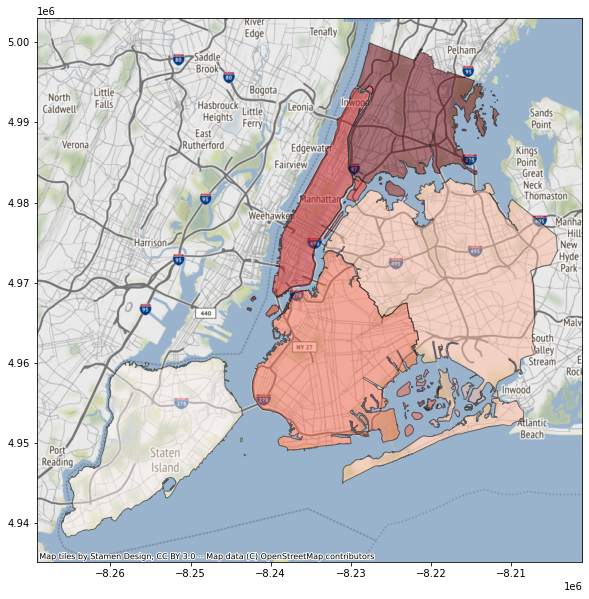

In [253]:
nyc_shp_1 = nyc_shp.to_crs(epsg=3857)
ax = nyc_shp_1.plot(figsize=(10, 10), alpha=0.5, edgecolor='k' ,cmap='Reds',legend=True,scheme="quantiles")
#Add background tiles to plot
ctx.add_basemap(ax)

In [254]:
import math
from ast import literal_eval
def merc(Coords):
    """
    Converts to Mercator Coordinates from Latitude, Longitude in degrees because bokeh module depends on it
    Input = e.g., (42, -88)
    Output = e.g., (-9780000, -9745000)
    """
    Coordinates = Coords
    
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [255]:
import numpy as np
def TripDef(LatD, LonD, LatA, LonA):
    """
    TripDef function defines a UAM trip from Departure Aerodrome to Arrival Aerodrome
    
    Input: 
        LatD: [Type: float] : Latitude of Departure UAM Aerodrome
        LonD: [Type: float] : Longitude of Departure UAM Aerodrome
        LatA: [Type: float] : Latitude of Arrival UAM Aerodrome
        LonA: [Type: float] : Longitude of Arrival UAM Aerodrome
    
    Output:
        latitude position, longitude position
        
    """
    
    # Find the slope of the trip, with longitudinal axis being the x-axis and latitude axis being the y-axis
    delta = (LatA-LatD)/(LonA-LonD)

    # Use the linear function equation to define the time steps
    Lon = np.linspace(LonD, LonA, 100)    
    Lat = (delta * (Lon - LonD) + LatD)
    return Lon, Lat

In [259]:
import math

def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    # Compute spherical distance from spherical coordinates.

    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc*6371*0.621371

In [265]:
error = 10
step = 0.01
Lat1 = Lat_regional[7]
Lat2 = Lat1
Lon1 = Lon_regional[7]
Lon2 = Lon1
desired_distance = 4.28
while error > 1:
    dist_mi = distance_on_unit_sphere(Lat1,Lon1,Lat2,Lon2)
    error = abs(dist_mi - desired_distance)
    Lon2 += step

x, y = merc((Lat2, Lon2))
u,v = merc((Lat1, Lon1))

width = x-u
#print(x-u, y-v)

In [270]:
"""
Ref 1: https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-ii-intro-to-bokeh-5dca6c5ced10
Ref 2: https://stackoverflow.com/questions/57051517/cant-plot-dots-over-tile-on-bokeh
Ref 3: https://docs.bokeh.org/en/latest/docs/reference/tile_providers.html
Ref 4: https://matplotlib.org/2.0.2/examples/color/named_colors.html
Ref 5: https://stackoverflow.com/questions/44281863/saving-html-file-with-images-in-bokeh/44282125
"""
from bokeh.plotting import figure, show, output_notebook, output_file, save
from bokeh.tile_providers import CARTODBPOSITRON, ESRI_IMAGERY, OSM, STAMEN_TERRAIN, STAMEN_TERRAIN_RETINA
from bokeh.tile_providers import get_provider, Vendors 

tile_provider = get_provider(Vendors.ESRI_IMAGERY)

p = figure(x_range=(-9780000-100000, -9745000+100000), y_range=(5130000, 5160000),x_axis_type="mercator", y_axis_type="mercator", title="Chicago Metropolitan Area", plot_width=1875, plot_height=910)
p.add_tile(tile_provider)
p.circle(lat_m_regional, lon_m_regional, color = 'white', alpha = 1, size = 10)
p.circle(lat_m_heliports, lon_m_heliports, color = 'deepskyblue', alpha = 1, size = 10)
p.circle(lat_m_major, lon_m_major, color = 'yellow', alpha = 1, size = 10)

# plot the trip, feel free to change the origin and destination coordinates
LatD = lat_m_regional[7]
LonD = lon_m_regional[7]
LatA = lat_m_heliports[8]
LonA = lon_m_heliports[8]
LonTrip, LatTrip = TripDef(LatD, LonD, LatA, LonA)
p.line(LatTrip, LonTrip, color = 'white', line_width = 2)

# Don't forget to change the origin and destination here too!
tripDistGeodesic = distance_on_unit_sphere(Lat_regional[7],Lon_regional[7],Lat_heliports[8],Lon_heliports[8])
print(f'The trip distance is {tripDistGeodesic} miles')

# plot the reachable radius along the trip
for j in range(len(LatTrip)):
    if j % 10 == 0:
        p.circle(LatTrip[j], LonTrip[j], color = 'yellow', alpha = 1, size = 10)
        p.ellipse(LatTrip[j],LonTrip[j], alpha = 0.3, width=width, height=width, color="white")

output_notebook()
show(p)
output_file("test.html")
save(p)

The trip distance is 29.872771579470612 miles


Loading BokehJS ...

'C:\\Users\\Sai Mudumba\\Documents\\MSAAE_Thesis_Code\\test.html'